In [1]:
"""Import the libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [4]:
from sklearn.svm import SVR 
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression

In [5]:
##import Dataset
df = pd.read_csv("household.csv")
df1 =df.head(10000)
df1=df1.drop('datetime',axis=1)

In [6]:
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,16-12-2006 17:24,4.216,0.418,234.84,18.4,0,1,17,52.266670
1,16-12-2006 17:25,5.360,0.436,233.63,23.0,0,1,16,72.333336
2,16-12-2006 17:26,5.374,0.498,233.29,23.0,0,2,17,70.566666
3,16-12-2006 17:27,5.388,0.502,233.74,23.0,0,1,17,71.800000
4,16-12-2006 17:28,3.666,0.528,235.68,15.8,0,1,17,43.100000


In [7]:
df.tail()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
1048570,13-12-2008 21:34,0.426,0.076,242.27,1.8,0,0,0,7.100000
1048571,13-12-2008 21:35,0.424,0.076,242.10,1.8,0,0,0,7.066667
1048572,13-12-2008 21:36,0.422,0.076,241.73,1.8,0,0,0,7.033333
1048573,13-12-2008 21:37,0.422,0.078,242.56,1.8,0,0,0,7.033333
1048574,13-12-2008 21:38,0.422,0.078,242.61,1.8,0,0,0,7.033333


In [8]:
df.columns

Index(['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Sub_metering_4'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   datetime               1048575 non-null  object 
 1   Global_active_power    1048575 non-null  float64
 2   Global_reactive_power  1048575 non-null  float64
 3   Voltage                1048575 non-null  float64
 4   Global_intensity       1048575 non-null  float64
 5   Sub_metering_1         1048575 non-null  int64  
 6   Sub_metering_2         1048575 non-null  int64  
 7   Sub_metering_3         1048575 non-null  int64  
 8   Sub_metering_4         1048575 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 72.0+ MB


In [10]:
print(f"The Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The Dataset has 1048575 rows and 9 columns


In [11]:
df.isnull().sum()

datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [13]:
missing_value_df

,percent_missing
datetime,0.0
Global_active_power,0.0
Global_reactive_power,0.0
Voltage,0.0
Global_intensity,0.0
Sub_metering_1,0.0
Sub_metering_2,0.0
Sub_metering_3,0.0
Sub_metering_4,0.0


In [14]:
df1.shape

(10000, 8)

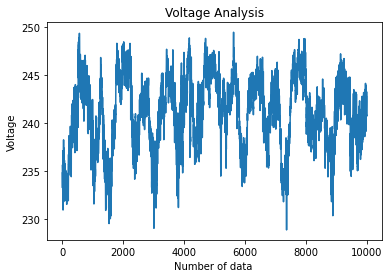

In [15]:
##Plotting based on voltage
df1["Voltage"].plot()
plt.title('Voltage Analysis')
plt.xlabel('Number of data ')
plt.ylabel('Voltage')
plt.show()

In [16]:
df1.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.220600,-0.715500,0.998643,0.310581,0.305997,0.550256,0.803786
Global_reactive_power,0.220600,1.000000,-0.151065,0.230694,0.046928,0.083446,0.051028,0.213732
Voltage,-0.715500,-0.151065,1.000000,-0.720715,-0.223900,-0.162351,-0.505091,-0.542463
Global_intensity,0.998643,0.230694,-0.720715,1.000000,0.314358,0.310379,0.538322,0.804953
Sub_metering_1,0.310581,0.046928,-0.223900,0.314358,1.000000,0.092146,0.113110,-0.014325
Sub_metering_2,0.305997,0.083446,-0.162351,0.310379,0.092146,1.000000,-0.045422,-0.057433
Sub_metering_3,0.550256,0.051028,-0.505091,0.538322,0.113110,-0.045422,1.000000,0.195847
Sub_metering_4,0.803786,0.213732,-0.542463,0.804953,-0.014325,-0.057433,0.195847,1.000000


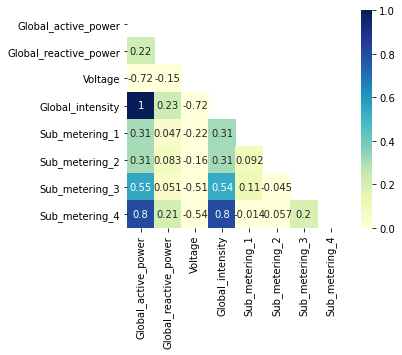

In [17]:
pearson = df1.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

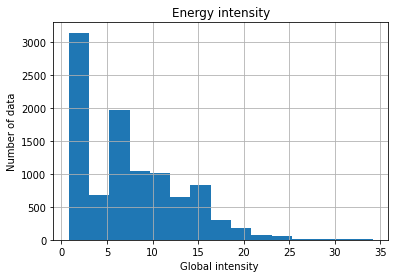

In [18]:
#Plotting based on Global intensity
df1["Global_intensity"].hist(bins=15)
plt.title('Energy intensity')
plt.xlabel('Global intensity ')
plt.ylabel('Number of data')
plt.show()


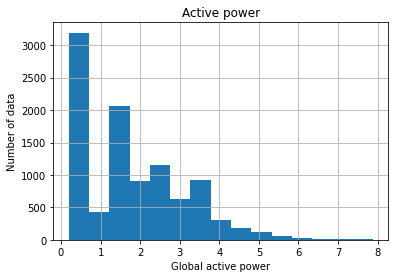

Checking the Missing Values
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    10000 non-null  float64
 1   Global_reactive_power  10000 non-null  float64
 2   Voltage                10000 non-null  float64
 3   Global_intensity       10000 non-null  float64
 4   Sub_metering_1         10000 non-null  int64  
 5   Sub_metering_2         10000 non-null  int64  
 6   Sub_metering_3         10000 non-null  int64  
 7   Sub_metering_4         10000 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 625.1 KB
None


In [19]:
#plotting based on global Active Power
df1["Global_active_power"].hist(bins=15)
plt.title('Active power')
plt.xlabel('Global active power')
plt.ylabel('Number of data')
plt.show()

"""Preprocessing"""

##Checking the missing values
print("Checking the Missing Values")
print(df1.isna().sum())
print("\n")

##checking Dataframe type
print(df1.info())


In [20]:
##splitting the data into label and target
y=df1.Global_active_power
x=df1.drop('Global_active_power',axis=1)

##splitting datasets into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)




In [21]:
"""Regression"""
    

   
""" Support vector Regression"""

regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

print("---Support Vector Regression---")
print()
print("""Mean Absolute Error""")
mae = mean_absolute_error(y_pred,y_test)
print(mae)


print()
print("" "Mean Squared Error""")
mse = mean_squared_error(y_pred,y_test)
print(mse)

print()
print("" "Root Mean Squared Error""")
mse = mean_squared_error(y_pred,y_test)
print(sqrt(mse))



---Support Vector Regression---

Mean Absolute Error
0.0481668490052033

Mean Squared Error
0.0029347083940707754

Root Mean Squared Error
0.054172948914294625


In [22]:
""" Linear Regression"""
  
regressor_linear =LinearRegression()
regressor_linear.fit(x_train, y_train)
y_pred_linear = regressor_linear.predict(x_test)


print()
print("---Linear Regression---")
print()
print("""Mean Absolute Error""")
mae_linear = mean_absolute_error(y_pred_linear,y_test)
print(mae_linear)

print()
print("" "Mean Squared Error""")
print(mean_squared_error(y_pred_linear,y_test))

print()
print("" "Root Mean Squared Error""")
print(sqrt(mean_squared_error(y_pred_linear,y_test)))



---Linear Regression---

Mean Absolute Error
3.385399654037835e-08

Mean Squared Error
2.9575539778232797e-15

Root Mean Squared Error
5.438339799813248e-08


C:\Users\dhana\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Ensembling the Model...
Mean Absolute Error
0.0033573044425249145

Mean Squared Error
0.00011965083011001565

Root Mean Squared Error
0.010938502187686194


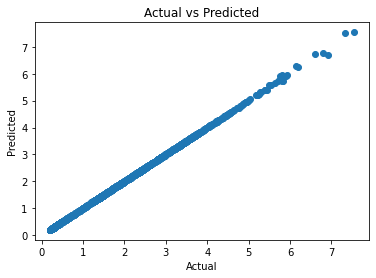

In [23]:
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
print("Ensembling the Model...")
stack = StackingCVRegressor(regressors=(regressor, regressor_linear),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(x_train, y_train)

pred_stack = stack.predict(x_test)
score = mean_squared_error(y_test, pred_stack)
print("""Mean Absolute Error""")
mae_stacked = mean_absolute_error(pred_stack,y_test)
print(mae_stacked)
print()
print("" "Mean Squared Error""")
print(score)
print()
print("" "Root Mean Squared Error""")
print(sqrt(mean_squared_error(y_test, pred_stack)))


df_prediction = pd.DataFrame({'Actual':y_test, 'Predicted':pred_stack})
df_prediction.plot('Actual', 'Predicted', kind='scatter')


plt.scatter(y_test,pred_stack)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [24]:
df = pd.DataFrame({'Actual': y_test, 'PRED':pred_stack})
df.

,Actual,PRED
6252,1.312,1.309213
4684,0.406,0.403808
1731,1.632,1.631212
4742,0.296,0.294573
4521,2.420,2.414721
...,...,...
6412,0.206,0.206068
8285,1.238,1.240666
7853,0.302,0.301795
1095,1.922,1.921913


In [25]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [28]:
df


,Actual,PRED
6252,1.312,1.309213
4684,0.406,0.403808
1731,1.632,1.631212
4742,0.296,0.294573
4521,2.420,2.414721
...,...,...
6412,0.206,0.206068
8285,1.238,1.240666
7853,0.302,0.301795
1095,1.922,1.921913
